1. What was the change in price of the currency over time?
2. What was the moving average of the various currencies?
3. What was the daily return of the currency on average?
4. What was the correlation between different cyrrenies?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For time stamps
from datetime import datetime

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-jz_fi4v7 because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Selected markets
markets = ['BTC', 'ETH', 'XMR', 'DASH','LTC', 'XRP']

# Dataset path
dataset_path = '/usr/src/app/dataset/csv/{}.csv'
date_parser = lambda date: datetime.strptime(date, "%Y-%m-%d")

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# 1. What was the change in price of the stock overtime?

In [3]:
market_data = {}
# Load all dataset into memory
for market in markets:

    # Load dataset with date parser
    dataset = pd.read_csv(dataset_path.format(market), parse_dates=["date"], date_parser=date_parser)
    dataset.sort_values(by=["date"], inplace=True)
    market_data.update({market: dataset})


# Display the first market in the market list
market_data[markets[0]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1828 entries, 1827 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1828 non-null   datetime64[ns]
 1   open    1828 non-null   float64       
 2   close   1828 non-null   float64       
 3   high    1828 non-null   float64       
 4   low     1828 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 85.7 KB


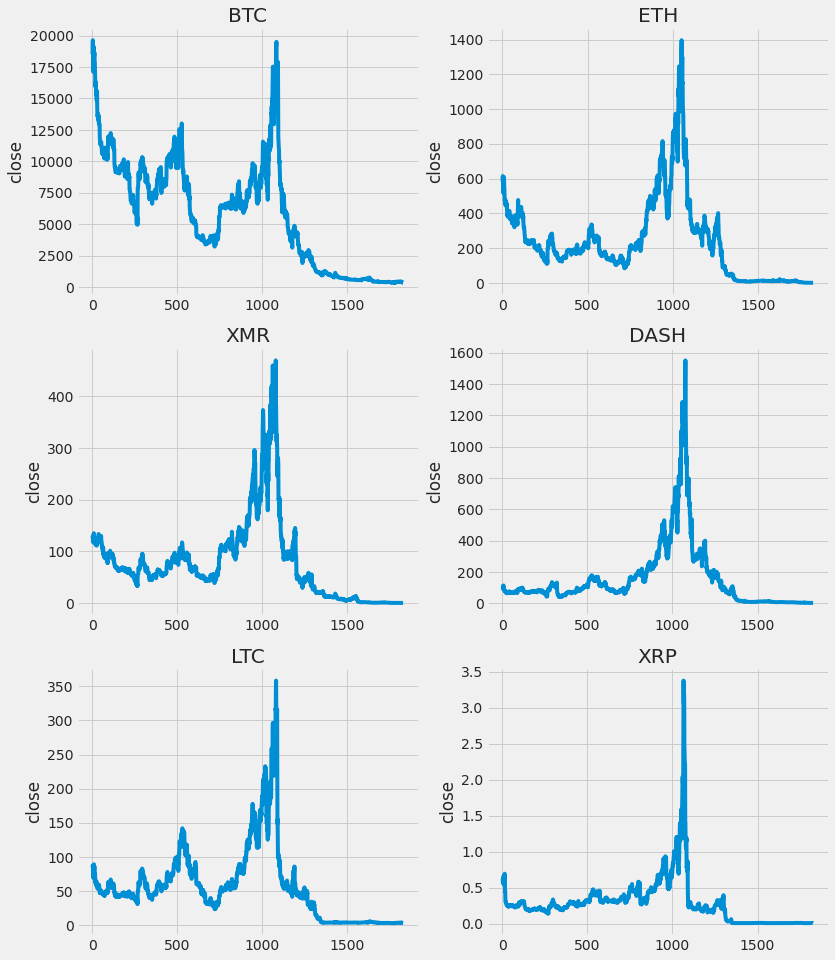

In [4]:
plt.figure(figsize=(12, 12))
plt.subplots_adjust(top=2.25, bottom=1.2)

for i, market in enumerate(markets, 1):
    plt.subplot(3, 2, i)
    market_data[market]['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.title(market)
plt.show()

# 2. What was the moving average of the various currencies?

array([[<AxesSubplot:title={'center':'open'}>,
        <AxesSubplot:title={'center':'close'}>,
        <AxesSubplot:title={'center':'high'}>],
       [<AxesSubplot:title={'center':'low'}>,
        <AxesSubplot:title={'center':'mean for 10 days'}>,
        <AxesSubplot:title={'center':'mean for 30 days'}>],
       [<AxesSubplot:title={'center':'mean for 60 days'}>,
        <AxesSubplot:title={'center':'mean for 90 days'}>,
        <AxesSubplot:title={'center':'mean for 180 days'}>]], dtype=object)

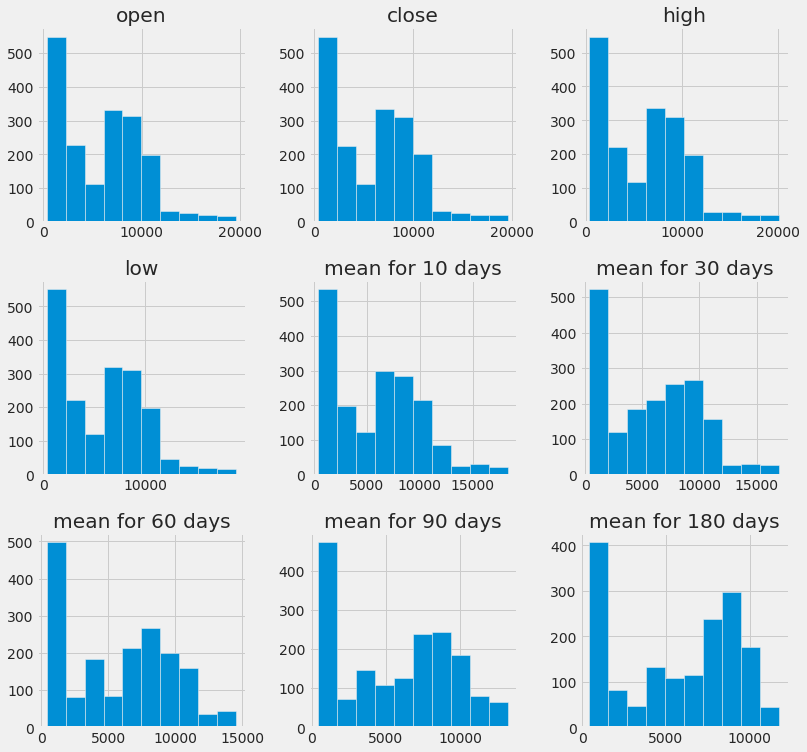

In [5]:
average_days = [10, 30, 60, 90, 180]

for average in average_days:
    for market in markets:
        column_name = f'mean for {average} days'
        market_data[market][column_name] = market_data[market]['close'].rolling(average).mean()

market_data['BTC'].hist(figsize=(12, 12));

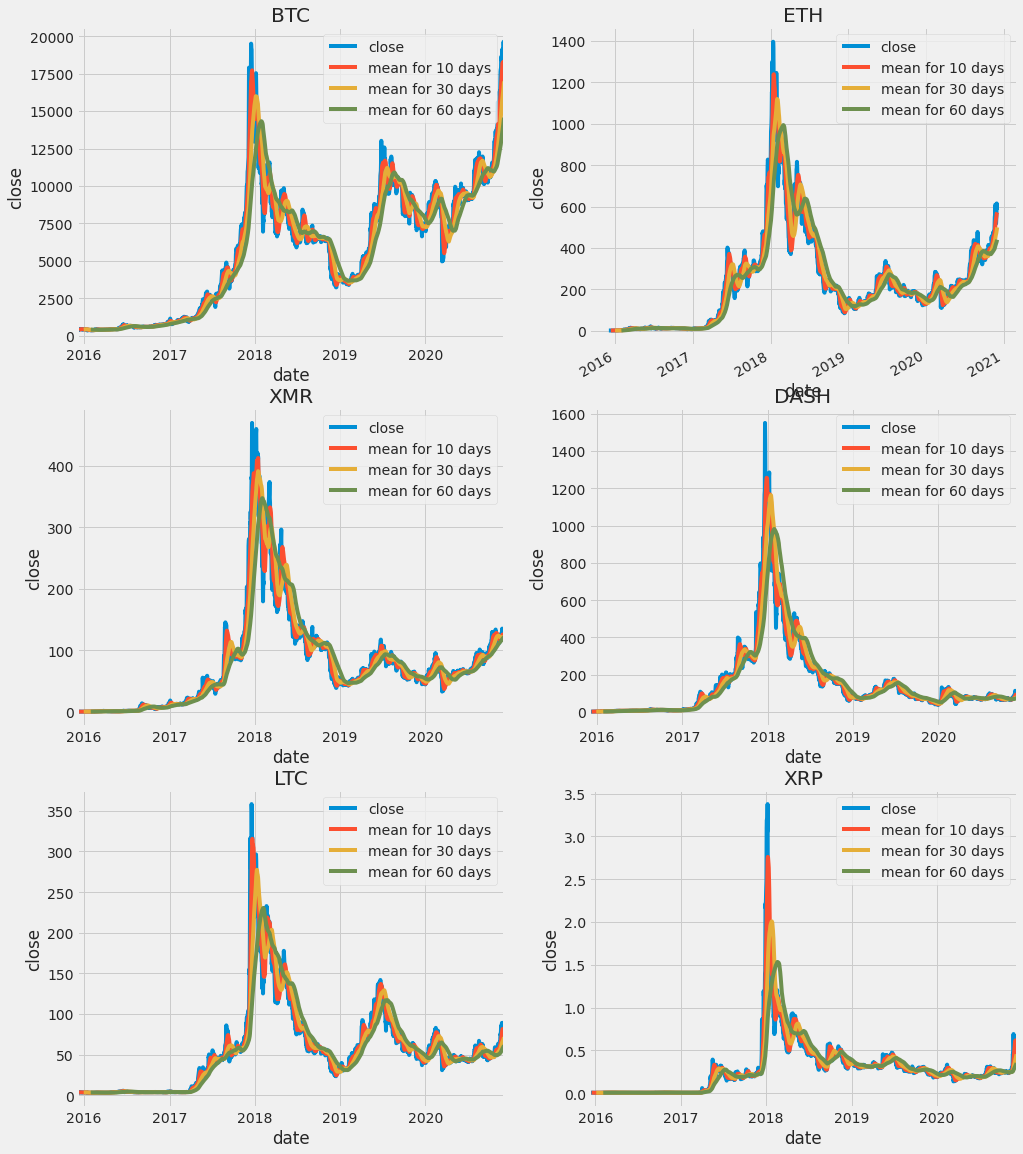

In [16]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.subplots_adjust(top=1.2, bottom=1)

for i, market in enumerate(markets):
    ax = axes[i // 2, i % 2]

    market_data[market][['date','close', 'mean for 10 days', 'mean for 30 days', 'mean for 60 days']].plot(ax=ax,x='date')
    ax.set_ylabel('close')
    ax.set_title(market)
plt.show()